In [70]:
# PCA on Iris dataset
def load_iris():
    from sklearn.datasets import load_iris
    iris = load_iris()
    return iris.data, iris.target
import numpy as np
import matplotlib.pyplot as plt

In [71]:
load_iris()

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [72]:
def mean(X):
    return np.sum(X, axis=0) / len(X)

In [73]:
def covariance_matrix(X):
    n_samples = len(X)
    X_centered = X - mean(X)
    return np.dot(X_centered.T, X_centered) / (n_samples - 1)

In [82]:
def pca(X, n_components=2):
    # Center the data
    X_mean = mean(X)
    X_centered = X - X_mean
    
    # Compute covariance matrix
    cov_matrix = covariance_matrix(X_centered)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvectors based on eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)
    sorted_indices = sorted_indices[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    print("Descending sorted eigenvalues:", sorted_eigenvalues)
    print("According to eigenvalues sorted eigenvectors: \n", sorted_eigenvectors,"\n")
    
    # Choose top n_components eigenvectors
    components = sorted_eigenvectors[:, :n_components]
    print("Non_normalized eigenvector of 2 greatest eigenvalues:\n", components)
    
    # Project the data onto the new feature space
    transformed_data = np.dot(X_centered, components)
    
    return transformed_data

In [83]:
# Load Iris dataset
X, y = load_iris()
print(X, "    ", y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [84]:
def scatter_plot(data, title):
    plt.scatter(data[:, 0], data[:, 1])
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

Descending sorted eigenvalues: [4.22824171 0.24267075 0.0782095  0.02383509]
According to eigenvalues sorted eigenvectors: 
 [[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]] 

Non_normalized eigenvector of 2 greatest eigenvalues:
 [[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]


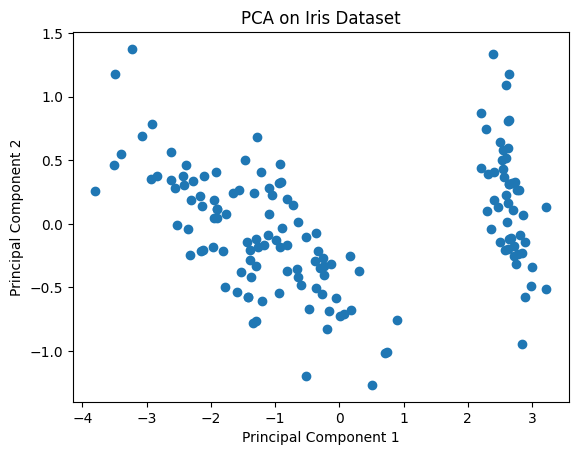

In [85]:
# PCA on Iris dataset
transformed_iris = pca(X)

scatter_plot(transformed_iris, 'PCA on Iris Dataset')